### Team Rating

In [88]:
import requests
import json

# API endpoint and parameters
url = "https://api-football-v1.p.rapidapi.com/v3/standings"
querystring = {"season": "2023", "league": "140"}

# Headers including the API key and host
headers = {
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

# Make the request
response = requests.get(url, headers=headers, params=querystring)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response JSON and save it to a file
    data = response.json()
    with open('standings_2023.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)
    print("Data has been saved to standings.json")
else:
    print(f"Failed to retrieve data: {response.status_code}")


Data has been saved to standings.json


In [89]:
import json
import pandas as pd

# Load the data from your JSON file
with open('standings_2020.json', 'r') as file:
    data = json.load(file)
    
import pandas as pd

# Assuming 'data' is your JSON response
standings_data = data['response'][0]['league']['standings'][0]

# Normalize the data and create a dataframe
df_20 = pd.json_normalize(standings_data)



In [90]:
import json
import pandas as pd

# Load the data from your JSON file
with open('standings_2021.json', 'r') as file:
    data = json.load(file)
    
import pandas as pd

# Assuming 'data' is your JSON response
standings_data = data['response'][0]['league']['standings'][0]

# Normalize the data and create a dataframe
df_21 = pd.json_normalize(standings_data)



In [91]:
import json
import pandas as pd

# Load the data from your JSON file
with open('standings_2022.json', 'r') as file:
    data = json.load(file)
    
import pandas as pd

# Assuming 'data' is your JSON response
standings_data = data['response'][0]['league']['standings'][0]

# Normalize the data and create a dataframe
df_22 = pd.json_normalize(standings_data)



In [92]:
import json
import pandas as pd

# Load the data from your JSON file
with open('standings_2023.json', 'r') as file:
    data = json.load(file)
    
import pandas as pd

# Assuming 'data' is your JSON response
standings_data = data['response'][0]['league']['standings'][0]

# Normalize the data and create a dataframe
df_23 = pd.json_normalize(standings_data)



In [93]:
df_23 = df_23.drop(['group', 'status', 'description', 'update', 'team.logo'], axis=1)

In [94]:
df20 = df_20.copy()
df21 = df_21.copy()
df22 = df_22.copy()
df23 = df_23.copy()

In [95]:
df23

,rank,points,goalsDiff,form,team.id,team.name,all.played,all.win,all.draw,all.lose,...,home.draw,home.lose,home.goals.for,home.goals.against,away.played,away.win,away.draw,away.lose,away.goals.for,away.goals.against
0,1,38,24,WWWDW,541,Real Madrid,15,12,2,1,...,1,0,17,3,8,6,1,1,16,6
1,2,38,16,WDWWW,547,Girona,15,12,2,1,...,1,1,18,10,7,6,1,0,16,8
2,3,34,14,WDWWL,529,Barcelona,15,10,4,1,...,0,1,16,5,7,3,4,0,12,9
3,4,31,17,LWWLW,530,Atletico Madrid,14,10,1,3,...,0,0,17,7,7,3,1,3,13,6
4,5,28,12,WDWWD,531,Athletic Club,15,8,4,3,...,2,1,22,11,7,3,2,2,8,7
5,6,26,8,DWWLD,548,Real Sociedad,15,7,5,3,...,2,1,17,10,7,2,3,2,9,8
6,7,25,2,DWDWW,543,Real Betis,15,6,7,2,...,2,0,10,2,8,1,5,2,8,14
7,8,21,0,WLDWW,534,Las Palmas,15,6,3,6,...,2,1,8,4,8,2,1,5,5,9
8,9,19,-3,LDLWD,532,Valencia,15,5,4,6,...,1,2,8,3,8,1,3,4,9,17
9,10,19,-3,LWDWD,546,Getafe,15,4,7,4,...,3,0,8,4,8,0,4,4,9,16


In [96]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Your DataFrames are df2016, df2017, df2018, df2019
# They all have 'team', 'points', and 'goalsDiff' as columns.

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Updated function to include year in the normalized column names
def normalize_features(df, year, scaler):
    df[[f'points_normalized_{year}', f'goalsDiff_normalized_{year}']] = scaler.fit_transform(df[['points', 'goalsDiff']])
    return df

# Apply normalization to each DataFrame with year labels

df2020 = normalize_features(df20, 2020, minmax_scaler)
df2021 = normalize_features(df21, 2021, minmax_scaler)
df2022 = normalize_features(df22, 2022, minmax_scaler)
df2023 = normalize_features(df23, 2023, minmax_scaler)

# You would continue with the rest of your code as before,
# making sure to adjust column names in the merging and weighting steps accordingly.
df2023

,rank,points,goalsDiff,form,team.id,team.name,all.played,all.win,all.draw,all.lose,...,home.goals.for,home.goals.against,away.played,away.win,away.draw,away.lose,away.goals.for,away.goals.against,points_normalized_2023,goalsDiff_normalized_2023
0,1,38,24,WWWDW,541,Real Madrid,15,12,2,1,...,17,3,8,6,1,1,16,6,1.000000,1.000000
1,2,38,16,WDWWW,547,Girona,15,12,2,1,...,18,10,7,6,1,0,16,8,1.000000,0.822222
2,3,34,14,WDWWL,529,Barcelona,15,10,4,1,...,16,5,7,3,4,0,12,9,0.882353,0.777778
3,4,31,17,LWWLW,530,Atletico Madrid,14,10,1,3,...,17,7,7,3,1,3,13,6,0.794118,0.844444
4,5,28,12,WDWWD,531,Athletic Club,15,8,4,3,...,22,11,7,3,2,2,8,7,0.705882,0.733333
5,6,26,8,DWWLD,548,Real Sociedad,15,7,5,3,...,17,10,7,2,3,2,9,8,0.647059,0.644444
6,7,25,2,DWDWW,543,Real Betis,15,6,7,2,...,10,2,8,1,5,2,8,14,0.617647,0.511111
7,8,21,0,WLDWW,534,Las Palmas,15,6,3,6,...,8,4,8,2,1,5,5,9,0.500000,0.466667
8,9,19,-3,LDLWD,532,Valencia,15,5,4,6,...,8,3,8,1,3,4,9,17,0.441176,0.400000
9,10,19,-3,LWDWD,546,Getafe,15,4,7,4,...,8,4,8,0,4,4,9,16,0.441176,0.400000


In [97]:
teams_2023 = df2023['team.name'].unique()
df_2022_filtered = df2022[df2022['team.name'].isin(teams_2023)]
df_2021_filtered = df2021[df2021['team.name'].isin(teams_2023)]
df_2020_filtered = df2020[df2020['team.name'].isin(teams_2023)]


In [98]:

df_2023_norm = df2023[['team.name', 'points_normalized_2023', 'goalsDiff_normalized_2023']]


df_2021_norm = df_2021_filtered[['team.name', 'points_normalized_2021', 'goalsDiff_normalized_2021']]

df_2020_norm = df_2020_filtered[['team.name', 'points_normalized_2020', 'goalsDiff_normalized_2020']]

# Selecting normalized columns for 2018
df_2022_norm = df_2022_filtered[['team.name', 'points_normalized_2022', 'goalsDiff_normalized_2022']]





In [99]:
df_2023_norm

,team.name,points_normalized_2023,goalsDiff_normalized_2023
0,Real Madrid,1.000000,1.000000
1,Girona,1.000000,0.822222
2,Barcelona,0.882353,0.777778
3,Atletico Madrid,0.794118,0.844444
4,Athletic Club,0.705882,0.733333
5,Real Sociedad,0.647059,0.644444
6,Real Betis,0.617647,0.511111
7,Las Palmas,0.500000,0.466667
8,Valencia,0.441176,0.400000
9,Getafe,0.441176,0.400000


In [100]:
df_2020_norm

,team.name,points_normalized_2020,goalsDiff_normalized_2020
0,Atletico Madrid,1.000000,0.928571
1,Real Madrid,0.964286,0.885714
2,Barcelona,0.875000,1.000000
3,Sevilla,0.839286,0.614286
4,Real Sociedad,0.571429,0.628571
5,Real Betis,0.553571,0.328571
6,Villarreal,0.500000,0.557143
7,Celta Vigo,0.410714,0.300000
8,Granada CF,0.285714,0.071429
9,Athletic Club,0.285714,0.385714


In [101]:
df_merged = df_2023_norm.merge(df_2022_norm, on='team.name', how='left')
df_merged = df_merged.merge(df_2021_norm, on='team.name', how='left')
df_merged = df_merged.merge(df_2020_norm, on='team.name', how='left')

In [102]:
df_merged

,team.name,points_normalized_2023,goalsDiff_normalized_2023,points_normalized_2022,goalsDiff_normalized_2022,points_normalized_2021,goalsDiff_normalized_2021,points_normalized_2020,goalsDiff_normalized_2020
0,Real Madrid,1.000000,1.000000,0.841270,0.873563,1.000000,1.000000,0.964286,0.885714
1,Girona,1.000000,0.822222,0.380952,0.459770,NaN,NaN,NaN,NaN
2,Barcelona,0.882353,0.777778,1.000000,1.000000,0.763636,0.771084,0.875000,1.000000
3,Atletico Madrid,0.794118,0.844444,0.825397,0.850575,0.727273,0.674699,1.000000,0.928571
4,Athletic Club,0.705882,0.733333,0.412698,0.471264,0.436364,0.493976,0.285714,0.385714
5,Real Sociedad,0.647059,0.644444,0.730159,0.609195,0.563636,0.445783,0.571429,0.628571
6,Real Betis,0.617647,0.511111,0.555556,0.482759,0.618182,0.674699,0.553571,0.328571
7,Las Palmas,0.500000,0.466667,NaN,NaN,NaN,NaN,NaN,NaN
8,Valencia,0.441176,0.400000,0.269841,0.390805,0.309091,0.349398,0.232143,0.285714
9,Getafe,0.441176,0.400000,0.269841,0.298851,0.145455,0.313253,0.142857,0.114286


In [103]:
import pandas as pd
import numpy as np

# Assuming df_merged is your DataFrame after merging all the season data.

# Fill NaN values for teams not present in a season with 0
df_merged.fillna(0, inplace=True)

# Normalize the sums of points and goal difference within each season


In [104]:
for year in ['2020','2021','2022','2023']:
    points_col = f'points_normalized_{year}'
    goaldiff_col = f'goalsDiff_normalized_{year}'
    sum_col = f'sum_{year}'
    
    # Sum the points and goal differences for the season
    df_merged[sum_col] = df_merged[points_col] + df_merged[goaldiff_col]
    
    # Normalize the sum between 0 and 1
    max_value = df_merged[sum_col].max()
    df_merged[f'norm_sum_{year}'] = df_merged[sum_col] / max_value if max_value != 0 else 0

# Apply exponential weighting
weights = [1/(2.5**i) for i in range(4)][::-1]  # Correct exponential weights

# Now calculate the weighted sums for each year
for year, weight in zip(['2020','2021','2022','2023'], weights):
    df_merged[f'weighted_sum_{year}'] = df_merged[f'norm_sum_{year}'] * weight

# Calculate the overall team rating
weighted_columns = [f'weighted_sum_{year}' for year in ['2020', '2021','2022','2023']]
df_merged['team_rating'] = df_merged[weighted_columns].sum(axis=1) / sum(weights)

# Display the DataFrame with the team ratings


In [105]:
df_merged

,team.name,points_normalized_2023,goalsDiff_normalized_2023,points_normalized_2022,goalsDiff_normalized_2022,points_normalized_2021,goalsDiff_normalized_2021,points_normalized_2020,goalsDiff_normalized_2020,sum_2020,...,norm_sum_2021,sum_2022,norm_sum_2022,sum_2023,norm_sum_2023,weighted_sum_2020,weighted_sum_2021,weighted_sum_2022,weighted_sum_2023,team_rating
0,Real Madrid,1.000000,1.000000,0.841270,0.873563,1.000000,1.000000,0.964286,0.885714,1.850000,...,1.000000,1.714833,0.857417,2.000000,1.000000,0.061393,0.160000,0.342967,1.000000,0.963275
1,Girona,1.000000,0.822222,0.380952,0.459770,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.840722,0.420361,1.822222,0.911111,0.000000,0.000000,0.168144,0.911111,0.664566
2,Barcelona,0.882353,0.777778,1.000000,1.000000,0.763636,0.771084,0.875000,1.000000,1.875000,...,0.767360,2.000000,1.000000,1.660131,0.830065,0.062222,0.122778,0.400000,0.830065,0.871346
3,Atletico Madrid,0.794118,0.844444,0.825397,0.850575,0.727273,0.674699,1.000000,0.928571,1.928571,...,0.700986,1.675972,0.837986,1.638562,0.819281,0.064000,0.112158,0.335194,0.819281,0.819355
4,Athletic Club,0.705882,0.733333,0.412698,0.471264,0.436364,0.493976,0.285714,0.385714,0.671429,...,0.465170,0.883963,0.441981,1.439216,0.719608,0.022281,0.074427,0.176793,0.719608,0.611520
5,Real Sociedad,0.647059,0.644444,0.730159,0.609195,0.563636,0.445783,0.571429,0.628571,1.200000,...,0.504710,1.339354,0.669677,1.291503,0.645752,0.039822,0.080754,0.267871,0.645752,0.636822
6,Real Betis,0.617647,0.511111,0.555556,0.482759,0.618182,0.674699,0.553571,0.328571,0.882143,...,0.646440,1.038314,0.519157,1.128758,0.564379,0.029274,0.103430,0.207663,0.564379,0.557110
7,Las Palmas,0.500000,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.966667,0.483333,0.000000,0.000000,0.000000,0.483333,0.297619
8,Valencia,0.441176,0.400000,0.269841,0.390805,0.309091,0.349398,0.232143,0.285714,0.517857,...,0.329244,0.660646,0.330323,0.841176,0.420588,0.017185,0.052679,0.132129,0.420588,0.383363
9,Getafe,0.441176,0.400000,0.269841,0.298851,0.145455,0.313253,0.142857,0.114286,0.257143,...,0.229354,0.568692,0.284346,0.841176,0.420588,0.008533,0.036697,0.113738,0.420588,0.356870


In [106]:
import requests
import json

# API endpoint and parameters
url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"

querystring = {"league":"140","season":"2023"}
headers = {
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

# Make the request
response = requests.get(url, headers=headers, params=querystring)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response JSON and save it to a file
    data = response.json()
    with open('fixtures_2023.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)
    print("Data has been saved to standings.json")
else:
    print(f"Failed to retrieve data: {response.status_code}")


Data has been saved to standings.json


In [107]:
import pandas as pd
import json

# Load JSON data from a file
with open('fixtures_2023.json', 'r') as f:
    data = json.load(f)

# Extracting fixtures information
fixtures_data = []
for fixture in data['response']:
    # Concatenating home and away full-time goals to create the scoreline
    scoreline = str(fixture['score']['fulltime']['home']) + ' - ' + str(fixture['score']['fulltime']['away'])
    fixture_info = {
        'date': fixture['fixture']['date'],
        'home_team': fixture['teams']['home']['name'],
        'away_team': fixture['teams']['away']['name'],
        'full_time_score': scoreline  # Adding the scoreline
    }
    fixtures_data.append(fixture_info)

# Creating DataFrame
df_fixtures = pd.DataFrame(fixtures_data)


In [108]:
df_fixtures_2023 = df_fixtures.copy()

In [109]:
# Convert the 'date' column to datetime
df_fixtures_2023['date'] = pd.to_datetime(df_fixtures_2023['date'])
df_fixtures_2023['date'] = df_fixtures_2023['date'].dt.date
df_fixtures_2023.sort_values(by='date', inplace=True)


In [110]:
import pandas as pd
from datetime import datetime

# Dictionary mapping matchdays to date ranges (YYYY-MM-DD format)
matchday_dict = {
    1: ("2023-08-11", "2023-08-14"),
    2: ("2023-08-18", "2023-08-21"),
    3: ("2023-08-25", "2023-08-28"),
    4: ("2023-09-01", "2023-09-03"),
    5: ("2023-09-15", "2023-09-18"),
    6: ("2023-09-22", "2023-09-24"),
    7: ("2023-09-26", "2023-09-28"),
    8: ("2023-09-29", "2023-10-02"),
    9: ("2023-10-06", "2023-10-08"),
    10: ("2023-10-20", "2023-10-23"),  # You may need to adjust this range
    11: ("2023-10-27", "2023-10-30"),
    12: ("2023-11-03", "2023-11-06"),
    13: ("2023-11-10", "2023-11-12"),
    14: ("2023-11-24", "2023-11-27"),
    15: ("2023-12-01", "2023-12-04"),
    16: ("2023-12-08", "2023-12-11"),
    17: ("2023-12-15", "2023-12-18"),
    18: ("2023-12-19", "2023-12-21"),
    19: ("2024-01-03", "2024-01-03"),
    20: ("2024-01-14", "2024-01-14"),
    21: ("2024-01-21", "2024-01-21"),
    22: ("2024-01-28", "2024-01-28"),
    23: ("2024-02-04", "2024-02-04"),
    24: ("2024-02-11", "2024-02-11"),  # This range seems incorrect, might need adjustment
    25: ("2024-02-18", "2024-02-18"),
    26: ("2024-02-25", "2024-02-25"),
    27: ("2024-03-03", "2024-03-03"),
    28: ("2024-03-10", "2024-03-10"),
    29: ("2024-03-17", "2024-03-17"),
    30: ("2024-03-31", "2024-03-31"),
    31: ("2024-04-14", "2024-04-14"),
    32: ("2024-04-21", "2024-04-21"),
    33: ("2024-04-28", "2024-04-28"),
    34: ("2024-05-05", "2024-05-05"),
    35: ("2024-05-12", "2024-05-12"),
    36: ("2024-05-15", "2024-05-15"),
    37: ("2024-05-19", "2024-05-19"),
    38: ("2024-05-26", "2024-05-26")
}


# Convert matchday_dict to a DataFrame
matchday_df = pd.DataFrame([
    {"matchday": md, "start_date": pd.Timestamp(sd), "end_date": pd.Timestamp(ed)}
    for md, (sd, ed) in matchday_dict.items()
])



# Function to find matchday for each date
def find_matchday(game_date):
    for index, row in matchday_df.iterrows():
        if row['start_date'] <= pd.Timestamp(game_date) <= row['end_date']:
            return row['matchday']
    return None

# Map each game to its corresponding matchday number
df_fixtures_2023['matchday'] = df_fixtures_2023['date'].apply(find_matchday)




In [111]:
df_fixtures_2023

,date,home_team,away_team,full_time_score,matchday
0,2023-08-11,Almeria,Rayo Vallecano,0 - 2,1.0
4,2023-08-11,Sevilla,Valencia,1 - 2,1.0
1,2023-08-12,Athletic Club,Real Madrid,0 - 2,1.0
5,2023-08-12,Las Palmas,Mallorca,1 - 1,1.0
8,2023-08-12,Real Sociedad,Girona,1 - 1,1.0
...,...,...,...,...,...
374,2024-05-26,Osasuna,Villarreal,None - None,38.0
375,2024-05-26,Rayo Vallecano,Athletic Club,None - None,38.0
376,2024-05-26,Real Sociedad,Atletico Madrid,None - None,38.0
377,2024-05-26,Sevilla,Barcelona,None - None,38.0


In [112]:
df_fixtures_2023[df_fixtures_2023['matchday'].isna()]

,date,home_team,away_team,full_time_score,matchday
125,2023-11-29,Mallorca,Cadiz,1 - 1,NaN
31,2023-12-23,Atletico Madrid,Sevilla,None - None,NaN
181,2024-01-02,Valencia,Villarreal,None - None,NaN
189,2024-01-02,Real Sociedad,Alaves,None - None,NaN
180,2024-01-02,Getafe,Rayo Vallecano,None - None,NaN
182,2024-01-04,Osasuna,Almeria,None - None,NaN
183,2024-01-04,Sevilla,Athletic Club,None - None,NaN
185,2024-01-04,Las Palmas,Barcelona,None - None,NaN
193,2024-01-30,Barcelona,Osasuna,None - None,NaN


In [113]:
# Assuming df_fixtures is your DataFrame

# Specify the conditions for the row you want to update
conditions = (
    (df_fixtures_2023['home_team'] == 'Barcelona') & 
    (df_fixtures_2023['away_team'] == 'Osasuna') & 
    (df_fixtures_2023['date'] == pd.Timestamp('2024-01-30'))
)

# Set the new date for the specified row
df_fixtures_2023.loc[conditions, 'date'] = pd.Timestamp('2024-01-14')

# Set the matchday for the specified row, replacing 'matchday_value' with the correct matchday
matchday_value = 20  # Replace with the actual matchday value if different
df_fixtures_2023.loc[conditions, 'matchday'] = matchday_value

# Assuming you've handled all NaN values in the matchday column, convert the matchday column to integer

In [114]:
# Assuming df_fixtures is your DataFrame

# Specify the conditions for the row you want to update
conditions = (
    (df_fixtures_2023['home_team'] == 'Mallorca') & 
    (df_fixtures_2023['away_team'] == 'Cadiz')
)



# Set the matchday for the specified row, replacing 'matchday_value' with the correct matchday
matchday_value = 13  # Replace with the actual matchday value if different
df_fixtures_2023.loc[conditions, 'matchday'] = matchday_value

# Assuming you've handled all NaN values in the matchday column, convert the matchday column to integer

In [115]:
# Assuming df_fixtures is your DataFrame

# Specify the conditions for the row you want to update
conditions = (
    (df_fixtures_2023['home_team'] == 'Atletico Madrid') & 
    (df_fixtures_2023['away_team'] == 'Sevilla')
)



# Set the matchday for the specified row, replacing 'matchday_value' with the correct matchday
matchday_value = 4  # Replace with the actual matchday value if different
df_fixtures_2023.loc[conditions, 'matchday'] = matchday_value

# Assuming you've handled all NaN values in the matchday column, convert the matchday column to integer

In [116]:
df_fixtures_2023 = df_fixtures_2023.dropna()

In [117]:
# Assuming df_fixtures is your DataFrame with the matchday column
df_fixtures_2023['matchday'] = df_fixtures_2023['matchday'].astype(int)
df_ratings = df_merged[['team.name', 'team_rating']]

In [118]:
df_fixtures_2023[df_fixtures_2023.isna().any(axis=1)]

,date,home_team,away_team,full_time_score,matchday


In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have two DataFrames: fixtures_df and ratings_df
# fixtures_df contains columns: ['date', 'home_team', 'away_team', 'full_time_score', 'matchday']
# ratings_df contains columns: ['team.name', 'team_rating']

# Merge the fixtures dataframe with the ratings dataframe for both home and away teams
df_fixtures_2023 = df_fixtures_2023.merge(df_ratings, left_on='home_team', right_on='team.name', how='left')
df_fixtures_2023 = df_fixtures_2023.merge(df_ratings, left_on='away_team', right_on='team.name', how='left', suffixes=('_home', '_away'))


In [120]:
df_fixtures_2023 = df_fixtures_2023[df_fixtures_2023['matchday'] <= 12]


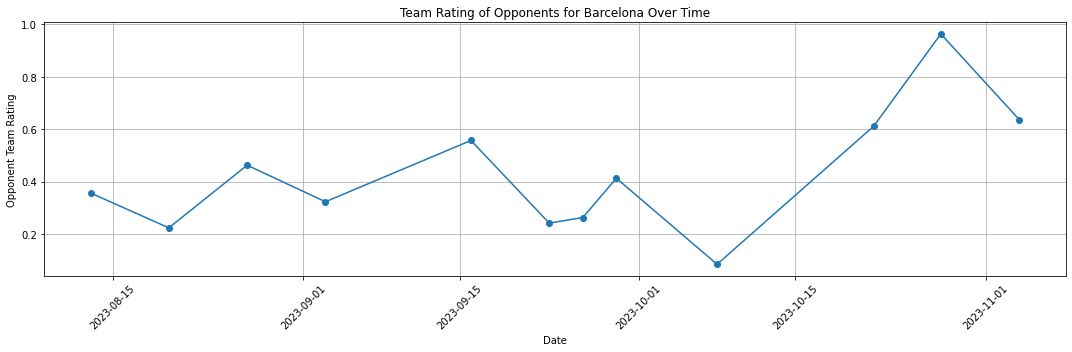

In [121]:
# Drop the duplicate 'team.name' columns from the merge
df_fixtures_2023.drop(columns=['team.name_home', 'team.name_away'], inplace=True)

# Function to plot the ratings for a given team
def plot_ratings_for_team(team, df):
    # Filter matches where the team is either home or away
    df_team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    
    # Determine opponent ratings based on whether the team is home or away
    df_team_matches['opponent_rating'] = df_team_matches.apply(
        lambda row: row['team_rating_away'] if row['home_team'] == team else row['team_rating_home'], axis=1
    )
    
    # Sort the matches by date
    df_team_matches.sort_values('date', inplace=True)
    
    # Plotting the line graph
    plt.figure(figsize=(15, 5))
    plt.plot(df_team_matches['date'], df_team_matches['opponent_rating'], marker='o', linestyle='-')
    plt.title(f'Team Rating of Opponents for {team} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Opponent Team Rating')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout() # This ensures that the plot is neatly laid out
    plt.show()

# Now you can call this function for any team. For example:
plot_ratings_for_team('Barcelona', df_fixtures_2023)


In [122]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming df_fixtures_2019 and df_ratings are your DataFrames

# Function to create traces for each team
def create_trace_for_team(team, df):
    df_team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()
    df_team_matches['opponent_rating'] = df_team_matches.apply(
        lambda row: row['team_rating_away'] if row['home_team'] == team else row['team_rating_home'], axis=1
    )
    df_team_matches.sort_values('date', inplace=True)
    
    # Create a list of hover texts for each data point
    hover_text = [
        f"Current Team: {team}<br>"
        f"Opponent Team: {row['home_team'] if row['away_team'] == team else row['away_team']}<br>"
        f"Matchday: {row['matchday']}<br>"
        f"Date: {row['date'].strftime('%Y-%m-%d')}<br>"
        f"Score: {row['full_time_score']}<br>"
        f"Team Rating: {row['opponent_rating']*100:.2f} %"  # Format the rating to display 2 decimal places with %
        for _, row in df_team_matches.iterrows()
    ]
    
    return [
        go.Scatter(
            x=df_team_matches['date'],
            y=df_team_matches['opponent_rating'] * 100,  # Multiply by 100 to match the desired range
            name=team,
            mode='lines+markers',  # Set mode to lines+markers to display both line and markers
            line=dict(
                width=3,  # Set line width as needed
                color='lightcoral'  # Set line color to light red
            ),
            marker=dict(
                size=12,  # Set the marker size to make it bigger
                symbol='circle',  # Use 'circle' symbol for a dot
                opacity=0.7,  # Adjust opacity as needed
                color='lightcoral'  # Set marker color to light red
            ),
            hoverinfo='text',  # Show hover text
            text=hover_text  # Set hover text
        )
    ]

# Get a list of unique teams
teams = df_fixtures_2023['home_team'].unique()

# Create a figure with one subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each team to the figure, but make them invisible
for team in teams:
    traces = create_trace_for_team(team, df_fixtures_2023)
    for trace in traces:
        fig.add_trace(trace, row=1, col=1)

# Only the first trace is initially visible
for i in range(len(fig.data)):
    fig.data[i].visible = False
fig.data[0].visible = True

# Create a dropdown menu with one option for each team
dropdown_buttons = [
    {'label': team,
     'method': 'update',
     'args': [{'visible': [i == j for i in range(len(teams))]},
              {'title': f'Team Rating of Opponents for {team} Over Time'}]}
    for j, team in enumerate(teams)
]

# Update the figure layout to add the dropdown
fig.update_layout(
    updatemenus=[
        {'buttons': dropdown_buttons,
         'direction': 'down',
         'pad': {"r": 10, "t": 10},  # Adjust spacing to prevent overlap with title
         'showactive': True,
         'x': 0.5,
         'xanchor': 'center',
         'y': 1.15,
         'yanchor': 'top'}
    ],
    title_text="Fixtures",
    xaxis_title="Date",
    yaxis_title="Opponent Team Rating",  # Adjust the y-axis label
    yaxis=dict(range=[0, 100], showgrid=True, gridcolor='black'),  # Set the y-axis range to 0-100 and show grid
    xaxis=dict(showgrid=False),  # Hide x-axis grid
    paper_bgcolor='white',  # Set background color to white
    plot_bgcolor='white',  # Set plot background color to white
)

# Show the figure
fig.show()


### Team Form

In [123]:
import pandas as pd

# Assuming you have a DataFrame named df with columns: ['date', 'team', 'opponent', 'goals', 'opponent_rating']
df23_tf = df_merged
# Sort the DataFrame by date in descending order

In [124]:
import pandas as pd
import json

# Load JSON data from a file
with open('fixtures_2023.json', 'r') as f:
    data = json.load(f)

# Filter for fixtures where status long is 'Match Finished'
finished_matches = [fixture for fixture in data['response'] if fixture['fixture']['status']['long'] == 'Match Finished']

# Optional: Convert the filtered data into a DataFrame
df_finished_matches = pd.json_normalize(finished_matches)

data

{'get': 'fixtures',
 'parameters': {'league': '140', 'season': '2023'},
 'errors': [],
 'results': 380,
 'paging': {'current': 1, 'total': 1},
 'response': [{'fixture': {'id': 1037952,
    'referee': 'Javier Alberola',
    'timezone': 'UTC',
    'date': '2023-08-11T17:30:00+00:00',
    'timestamp': 1691775000,
    'periods': {'first': 1691775000, 'second': 1691778600},
    'venue': {'id': 19216,
     'name': 'Power Horse Stadium – Estadio de los Juegos Mediterráneos',
     'city': 'Almería'},
    'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}},
   'league': {'id': 140,
    'name': 'La Liga',
    'country': 'Spain',
    'logo': 'https://media-4.api-sports.io/football/leagues/140.png',
    'flag': 'https://media-4.api-sports.io/flags/es.svg',
    'season': 2023,
    'round': 'Regular Season - 1'},
   'teams': {'home': {'id': 723,
     'name': 'Almeria',
     'logo': 'https://media-4.api-sports.io/football/teams/723.png',
     'winner': False},
    'away': {'id': 728,


In [125]:
df_finished_matches.columns

Index(['fixture.id', 'fixture.referee', 'fixture.timezone', 'fixture.date',
       'fixture.timestamp', 'fixture.periods.first', 'fixture.periods.second',
       'fixture.venue.id', 'fixture.venue.name', 'fixture.venue.city',
       'fixture.status.long', 'fixture.status.short', 'fixture.status.elapsed',
       'league.id', 'league.name', 'league.country', 'league.logo',
       'league.flag', 'league.season', 'league.round', 'teams.home.id',
       'teams.home.name', 'teams.home.logo', 'teams.home.winner',
       'teams.away.id', 'teams.away.name', 'teams.away.logo',
       'teams.away.winner', 'goals.home', 'goals.away', 'score.halftime.home',
       'score.halftime.away', 'score.fulltime.home', 'score.fulltime.away',
       'score.extratime.home', 'score.extratime.away', 'score.penalty.home',
       'score.penalty.away'],
      dtype='object')

In [126]:
import pandas as pd

# Assuming df_finished_matches is your DataFrame

# Extracting fixtures information and calculating goal difference
fixtures_data = []
for index, row in df_finished_matches.iterrows():
    # Extracting home and away goals
    home_goals = row['goals.home']
    away_goals = row['goals.away']

    # Calculating goal difference
    goal_difference = home_goals - away_goals

    fixture_info = {
        'date': row['fixture.date'],
        'home_team': row['teams.home.name'],
        'away_team': row['teams.away.name'],
        'goal_difference': goal_difference  # Adding the goal difference
    }
    fixtures_data.append(fixture_info)

# Creating DataFrame
df_fixtures = pd.DataFrame(fixtures_data)


In [127]:
df_fix_2023 = df_fixtures.copy()

In [128]:
# Convert the 'date' column to datetime
df_fix_2023['date'] = pd.to_datetime(df_fix_2023['date'])
df_fix_2023['date'] = df_fix_2023['date'].dt.date

In [129]:
fixtures_2023 = df_fixtures_2023.copy()

In [130]:
import pandas as pd

# Assuming you have df_fixtures and second_df dataframes

# Merge the dataframes based on 'date,' 'home_team,' and 'away_team'
fixtures_2023 = fixtures_2023.merge(df_fix_2023[['date', 'home_team', 'away_team', 'goal_difference']], 
                              on=['date', 'home_team', 'away_team'], 
                              how='left')

# Now merged_df contains the 'goal_difference' column from the second dataframe


In [131]:
fixtures_2023 = fixtures_2023.sort_values(by='date')
fixtures_2023_5f = fixtures_2023.copy() 

In [132]:
fixtures_2023_5f

,date,home_team,away_team,full_time_score,matchday,team_rating_home,team_rating_away,goal_difference
0,2023-08-11,Almeria,Rayo Vallecano,0 - 2,1,0.061003,0.349927,-2.0
1,2023-08-11,Sevilla,Valencia,1 - 2,1,0.413021,0.383363,-1.0
2,2023-08-12,Athletic Club,Real Madrid,0 - 2,1,0.611520,0.963275,-2.0
3,2023-08-12,Las Palmas,Mallorca,1 - 1,1,0.297619,0.263245,0.0
4,2023-08-12,Real Sociedad,Girona,1 - 1,1,0.636822,0.664566,0.0
...,...,...,...,...,...,...,...,...
115,2023-11-05,Real Madrid,Rayo Vallecano,0 - 0,12,0.963275,0.349927,0.0
116,2023-11-05,Villarreal,Athletic Club,2 - 3,12,0.462774,0.611520,-1.0
117,2023-11-05,Alaves,Almeria,1 - 0,12,0.221636,0.061003,1.0
118,2023-11-06,Getafe,Cadiz,1 - 0,12,0.356870,0.224001,1.0


In [133]:
import pandas as pd

def get_last_5_matches(df):
    # Convert the date column to datetime, if not already in datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    # Create a new DataFrame to store the last 5 matches for each team
    last_5_matches = pd.DataFrame()
    
    # Get unique teams from both home and away columns
    teams = pd.unique(df[['home_team', 'away_team']].values.ravel('K'))
    
    # For each team, get the last 5 matches
    for team in teams:
        # Get matches where the team was either home or away
        team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
        
        # Sort the matches by date in descending order and take the top 5
        most_recent_5 = team_matches.sort_values(by='date', ascending=False).head(5)
        
        # Append these matches to the last_5_matches DataFrame
        last_5_matches = pd.concat([last_5_matches, most_recent_5], ignore_index=True)
    
    # Since teams will have duplicates in the last_5_matches DataFrame (as they will appear in both home and away),
    # we need to remove these duplicates by keeping the first occurrence
    #last_5_matches = last_5_matches.drop_duplicates(subset=['date', 'home_team', 'away_team'], keep='first')
    
    return last_5_matches

# To use this function, you would call it with your dataframe:
last_5_df = get_last_5_matches(fixtures_2023_5f)

# Replace 'your_full_matches_df' with the variable name of your dataframe containing all matches.
#last_5_df.to_csv('last_5.csv')
# print(last_5_df)

In [134]:
teams = pd.unique(last_5_df[['home_team', 'away_team']].values.ravel('K'))

# Create a dictionary to hold dataframes for each team
team_dfs = {team: pd.DataFrame() for team in teams}

# Split the dataframe into individual team dataframes
for team in teams:
    team_home_games = last_5_df[last_5_df['home_team'] == team]
    team_away_games = last_5_df[last_5_df['away_team'] == team]
    # Combine the home and away games into one dataframe per team
    team_dfs[team] = pd.concat([team_home_games, team_away_games]).drop_duplicates()

In [135]:
import pandas as pd

def update_goal_difference(df):
    # Determine the team that occurs the most in 'home_team' and 'away_team' columns
    most_common_team = df['home_team'].append(df['away_team']).mode().iloc[0]

    # Check and update the 'goal_difference' column based on 'full_time_score'
    for index, row in df.iterrows():
        score_parts = row['full_time_score'].split('-')
        if most_common_team == row['home_team']:
            goal_difference = int(score_parts[0]) - int(score_parts[1])
        else:
            goal_difference = int(score_parts[1]) - int(score_parts[0])

        df.at[index, 'goal_difference'] = goal_difference

    return df


In [136]:
for team in teams:
    globals()[f"{team.replace(' ', '_')}_df"] = team_dfs[team]


In [137]:
# import warnings
# warnings.filterwarnings("ignore")

# # Assuming you have a dictionary 'team_dfs' containing DataFrames for each team
# for team, df in team_dfs.items():
#     updated_df = update_goal_difference(df)
#     team_dfs[team] = updated_df


In [138]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

def update_form_column(df, most_common_team):
    """
    Update the 'form' column of a DataFrame based on the given team.

    Args:
        df (pd.DataFrame): The DataFrame to update.
        most_common_team (str): The team to consider when calculating the 'form' column.

    Returns:
        pd.DataFrame: The DataFrame with the 'form' column updated.
    """
    def calculate_form(row):
        if most_common_team == row['home_team']:
            return row['goal_difference'] * row['team_rating_away']
        else:
            return row['goal_difference'] * row['team_rating_home']

    df['form'] = df.apply(calculate_form, axis=1)
    return df

# Usage example:
# Assuming you have a DataFrame 'Barcelona_df' and a 'most_common_team' variable
for team, df in team_dfs.items():
    new_df = update_form_column(df, team)
    team_dfs[team] = new_df

In [139]:
final_form_df = pd.DataFrame()

# Iterate through each team's DataFrame and calculate the sum of 'form' values
for team, df in team_dfs.items():
    total_form = df['form'].sum()
    final_form_value = total_form / len(df)  # Divide by the number of matches
    final_form_df.loc[team, 'final_form'] = final_form_value

# Reset the index to have the team names as a column
final_form_df.reset_index(inplace=True)
final_form_df.rename(columns={'index': 'team'}, inplace=True)

# Display the final_form_df DataFrame
# final_form_df

In [140]:
scaler = MinMaxScaler()

# Scale the 'final_form' column
final_form_df['final_form'] = scaler.fit_transform(final_form_df[['final_form']])

# Display the scaled final_form_df
# final_form_df

In [141]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots
# import pandas as pd

# # Assuming final_form_df and df_fixtures_2019 are your DataFrames
# # Replace these with your actual DataFrame loading if necessary

# app = dash.Dash(__name__)

# # Function to create traces for each team
# def create_trace_for_team(team, df):
#     df_team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()
#     df_team_matches['opponent_rating'] = df_team_matches.apply(
#         lambda row: row['team_rating_away'] if row['home_team'] == team else row['team_rating_home'], axis=1
#     )
#     df_team_matches.sort_values('date', inplace=True)
    
#     hover_text = [
#         f"Current Team: {team}<br>"
#         f"Opponent Team: {row['home_team'] if row['away_team'] == team else row['away_team']}<br>"
#         f"Matchday: {row['matchday']}<br>"
#         f"Date: {row['date'].strftime('%Y-%m-%d')}<br>"
#         f"Score: {row['full_time_score']}<br>"
#         f"Team Rating: {row['opponent_rating']*100:.2f} %"
#         for _, row in df_team_matches.iterrows()
#     ]
    
#     return [
#         go.Scatter(
#             x=df_team_matches['date'],
#             y=df_team_matches['opponent_rating'] * 100,
#             name=team,
#             mode='lines+markers',
#             line=dict(width=3, color='lightcoral'),
#             marker=dict(size=12, symbol='circle', opacity=0.7, color='lightcoral'),
#             hoverinfo='text',
#             text=hover_text
#         )
#     ]

# @app.callback(
#     [
#         Output('form-output', 'children'),
#         Output('team-graph', 'figure')
#     ],
#     [Input('team-dropdown', 'value')]
# )
# def update_output(selected_team):
#     # Update the current form text
#     form_text = ''
#     if selected_team is not None:
#         team_form = final_form_df[final_form_df['team'] == selected_team]['final_form'].values[0]
#         form_text = f'Current form: {team_form:.2%}'

#     # Update the figure to show the selected team's data
#     fig = make_subplots(rows=1, cols=1)
#     for team in df_fixtures_2023['home_team'].unique():
#         traces = create_trace_for_team(team, df_fixtures_2023)
#         for trace in traces:
#             trace['visible'] = (team == selected_team)
#             fig.add_trace(trace, row=1, col=1)
#     fig.update_layout(
#         title_text="Team Rating of Opponents Over Time",
#         xaxis_title="Date",
#         yaxis_title="Opponent Team Rating",
#         yaxis=dict(range=[0, 100], showgrid=True, gridcolor='black'),
#         xaxis=dict(showgrid=False),
#         paper_bgcolor='white',
#         plot_bgcolor='white'
#     )

#     # Here we set the visibility of the traces depending on the selected team
#     fig.for_each_trace(
#         lambda trace: trace.update(visible=True) if trace.name == selected_team else trace.update(visible=False)
#     )

#     return form_text, fig


# app.layout = html.Div([
#     dcc.Dropdown(
#         id='team-dropdown',
#         options=[{'label': team, 'value': team} for team in final_form_df['team'].unique()],
#         value=final_form_df['team'][0]
#     ),
#     html.Div(id='form-output'),
#     dcc.Graph(id='team-graph')
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)


### Stacked bar chart for goals scored and conceded


In [142]:
fixtures_5_g = df_fixtures_2023.copy()
fixtures_5_g = fixtures_5_g.iloc[:-1]
fixtures_5_g

,date,home_team,away_team,full_time_score,matchday,team_rating_home,team_rating_away
0,2023-08-11,Almeria,Rayo Vallecano,0 - 2,1,0.061003,0.349927
1,2023-08-11,Sevilla,Valencia,1 - 2,1,0.413021,0.383363
2,2023-08-12,Athletic Club,Real Madrid,0 - 2,1,0.611520,0.963275
3,2023-08-12,Las Palmas,Mallorca,1 - 1,1,0.297619,0.263245
4,2023-08-12,Real Sociedad,Girona,1 - 1,1,0.636822,0.664566
...,...,...,...,...,...,...,...
114,2023-11-05,Valencia,Granada CF,1 - 0,12,0.383363,0.085032
115,2023-11-05,Real Madrid,Rayo Vallecano,0 - 0,12,0.963275,0.349927
116,2023-11-05,Villarreal,Athletic Club,2 - 3,12,0.462774,0.611520
117,2023-11-05,Alaves,Almeria,1 - 0,12,0.221636,0.061003


In [143]:
teams = pd.unique(fixtures_5_g[['home_team', 'away_team']].values.ravel('K'))

In [144]:
# Create a dictionary to hold dataframes for each team
team_datafs = {team: pd.DataFrame() for team in teams}

# Split the dataframe into individual team dataframes
for team in teams:
    team_home_games = fixtures_5_g[fixtures_5_g['home_team'] == team]
    team_away_games = fixtures_5_g[fixtures_5_g['away_team'] == team]
    # Combine the home and away games into one dataframe per team
    team_datafs[team] = pd.concat([team_home_games, team_away_games]).drop_duplicates()

In [145]:
def split_goals(df, team_name):
    # Split the 'full_time_score' into two separate columns
    scores = df['full_time_score'].str.split(' - ', expand=True)
    df['home_goals'] = pd.to_numeric(scores[0], errors='coerce')
    df['away_goals'] = pd.to_numeric(scores[1], errors='coerce')

    # Define a function for calculating goals based on whether the team is home or away
    def calculate_goals(row):
        if pd.isna(row['home_goals']) or pd.isna(row['away_goals']):
            # If either score is NaN, the game might not have been played
            return None, None
        if row['home_team'] == team_name:
            return row['home_goals'], row['away_goals']
        else:
            return row['away_goals'], row['home_goals']

    # Apply the function to calculate 'goals_scored' and 'goals_conceded'
    df[['goals_scored', 'goals_conceded']] = df.apply(calculate_goals, axis=1, result_type="expand")

    return df[['matchday', 'goals_scored', 'goals_conceded']]

# Prepare the data for plotting
team_goals_data = {}
for team_name, df in team_dfs.items():
    try:
        team_goals_data[team_name] = split_goals(df, team_name)
    except Exception as e:
        print(f"An error occurred while processing team {team_name}: {e}")


In [146]:
for team in teams:
    globals()[f"{team.replace(' ', '_')}_df"] = team_datafs[team]


In [147]:
import pandas as pd
import plotly.graph_objs as go

# Assuming 'teams' is a list of team names and each team's data is in a DataFrame


# Define your color scheme for the bars
goals_scored_color = '#1f77b4'  # Example color for goals scored
goals_conceded_color = '#ff7f0e'  # Example color for goals conceded

# Create an empty figure
fig = go.Figure()

# Add a pair of traces (goals scored and goals conceded) for each team
for team in teams:
    team_df = globals()[f"{team.replace(' ', '_')}_df"]
    team_df[['goals_scored', 'goals_conceded']] = team_df['full_time_score'].str.split('-', expand=True).astype(int)
    
    # Trace for goals scored
    fig.add_trace(
        go.Bar(
            x=team_df['matchday'],
            y=team_df['goals_scored'],
            name=f'{team} Goals Scored',
            marker_color=goals_scored_color,
            visible=False,
            hoverinfo='y+name',
            hovertemplate='Matchday: %{x}<br>Goals Scored: %{y}<extra></extra>'
        )
    )
    
    # Trace for goals conceded
    fig.add_trace(
        go.Bar(
            x=team_df['matchday'],
            y=team_df['goals_conceded'],
            name=f'{team} Goals Conceded',
            marker_color=goals_conceded_color,
            visible=False,
            hoverinfo='y+name',
            hovertemplate='Matchday: %{x}<br>Goals Conceded: %{y}<extra></extra>'
        )
    )

# Create a list for the dropdown options
buttons = []

for i, team in enumerate(teams):
    # Set the visibility of all traces to False
    visibility = [False] * len(teams) * 2  # We have two traces per team
    # Set the visibility of the current team's traces to True
    visibility[i*2] = True  # Goals scored trace
    visibility[i*2 + 1] = True  # Goals conceded trace
    buttons.append(
        dict(
            label=team,
            method='update',
            args=[{'visible': visibility},
                  {'title': f'Stacked Bar Chart for {team}'}]
        )
    )

# Update the layout with the dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'pad': {'r': 10, 't': 10},
        'showactive': True,
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.1,
        'yanchor': 'top'
    }],
    barmode='stack',
    paper_bgcolor='#f8f9fa',  # Set the paper background color
    plot_bgcolor='#f8f9fa',  # Set the plot background color
    font=dict(
        family='Arial, Helvetica, sans-serif',  # Match the font family
        size=20,  # Match the font size
    ),
    title='Select a team to display the goals by matchday'
)

# Optionally set the first team to be visible by default
# Here we make the first team's traces visible
fig.data[0].visible = True
fig.data[1].visible = True

# Show the plot
fig.show()


### for the position

In [148]:
df_2023 = df2023.copy()

In [149]:
def update_output(selected_team):
    # Initialize the form text to be displayed
    form_text = ''
    
    # Check if a team has been selected
    if selected_team is not None:
        # Find the rank of the selected team
        team_rank = df_2023[df_2023['team.name'] == selected_team]['rank'].values[0]
        # Update the form text with the rank information
        form_text = f'Rank: {team_rank}'
    
    # Return the updated form text
    return form_text


In [150]:
# import dash
# from dash import html, dcc
# from dash.dependencies import Input, Output

# # Assuming 'final_form_df' is your DataFrame with the 'team' and 'rank' columns

# # Initialize the Dash app
# app = dash.Dash(__name__)

# # Define the layout of the app
# app.layout = html.Div([
#     # Dropdown for selecting a team
#     dcc.Dropdown(
#         id='team-dropdown',
#         options=[{'label': team, 'value': team} for team in df_2023['team.name']],
#         value=None  # No default value, require user to select an option
#     ),
#     # Div to display the rank
#     html.Div(id='rank-output')
# ])

# # Set up the callback
# @app.callback(
#     Output('rank-output', 'children'),
#     [Input('team-dropdown', 'value')]
# )
# def update_rank(selected_team):
#     return update_output(selected_team)

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)


### goals scored avg

In [151]:
import pandas as pd


df = df_fixtures_2023.copy()
df = df.iloc[:-1]

# Splitting the 'full_time_score' into two columns and converting them to numeric
df[['home_goals', 'away_goals']] = df['full_time_score'].str.split(' - ', expand=True).apply(pd.to_numeric)

# Calculating the total and average goals for home games
home_goals = df.groupby('home_team')['home_goals'].agg(['sum', 'count'])
home_goals['average_goals'] = home_goals['sum'] / home_goals['count']

# Calculating the total and average goals for away games
away_goals = df.groupby('away_team')['away_goals'].agg(['sum', 'count'])
away_goals['average_goals'] = away_goals['sum'] / away_goals['count']



In [152]:
# Combining the home and away goals and counts
total_goals = home_goals['sum'].add(away_goals['sum'], fill_value=0)
total_matches = home_goals['count'].add(away_goals['count'], fill_value=0)

# Calculating the overall average goals per team
average_goals_per_team = total_goals / total_matches

average_goals_per_team.sort_values(ascending=False)


home_team
Girona             2.416667
Atletico Madrid    2.363636
Barcelona          2.000000
Real Madrid        1.916667
Athletic Club      1.750000
Real Sociedad      1.666667
Sevilla            1.545455
Granada CF         1.416667
Villarreal         1.416667
Real Betis         1.333333
Valencia           1.250000
Getafe             1.166667
Almeria            1.166667
Osasuna            1.166667
Rayo Vallecano     1.166667
Mallorca           1.000000
Celta Vigo         0.916667
Alaves             0.833333
Cadiz              0.833333
Las Palmas         0.833333
dtype: float64

In [153]:

# Creating a DataFrame from the average goals per team
average_goals_df = average_goals_per_team.reset_index()
average_goals_df.columns = ['Team', 'Goals Scored Avg']

# Sorting the teams by 'Average Goals' and adding a 'Rank' column
average_goals_df = average_goals_df.sort_values(by='Goals Scored Avg', ascending=False).reset_index(drop=True)
average_goals_df['Rank'] = average_goals_df.index + 1


### goals conceded avg

In [154]:
# Calculating the total and average goals conceded for home games
home_goals_conceded = df.groupby('home_team')['away_goals'].agg(['sum', 'count'])
home_goals_conceded['average_goals_conceded'] = home_goals_conceded['sum'] / home_goals_conceded['count']

# Calculating the total and average goals conceded for away games
away_goals_conceded = df.groupby('away_team')['home_goals'].agg(['sum', 'count'])
away_goals_conceded['average_goals_conceded'] = away_goals_conceded['sum'] / away_goals_conceded['count']

# Combining the home and away goals conceded and counts
total_goals_conceded = home_goals_conceded['sum'].add(away_goals_conceded['sum'], fill_value=0)
total_matches_conceded = home_goals_conceded['count'].add(away_goals_conceded['count'], fill_value=0)

# Calculating the overall average goals conceded per team
average_goals_conceded_per_team = total_goals_conceded / total_matches_conceded

# Creating a DataFrame from the average goals conceded per team
average_goals_conceded_df = average_goals_conceded_per_team.reset_index()
average_goals_conceded_df.columns = ['Team', 'Average Goals Conceded']

# Sorting the teams by 'Average Goals Conceded' and adding a 'Rank' column
average_goals_conceded_df = average_goals_conceded_df.sort_values(by='Average Goals Conceded', ascending=True).reset_index(drop=True)
average_goals_conceded_df['Rank'] = average_goals_conceded_df.index + 1

 # Displaying the top 10 teams as an example


#### clean sheets 

In [155]:
# Calculating the number of clean sheets for home and away games
# Clean sheet is when no goals are conceded. Therefore, away_goals = 0 for home clean sheets, and home_goals = 0 for away clean sheets.

# Counting clean sheets for home games
home_clean_sheets = df[df['away_goals'] == 0].groupby('home_team').size()

# Counting clean sheets for away games
away_clean_sheets = df[df['home_goals'] == 0].groupby('away_team').size()

# Combining the home and away clean sheets
total_clean_sheets = home_clean_sheets.add(away_clean_sheets, fill_value=0)

# Creating a DataFrame from the total clean sheets per team
clean_sheets_df = total_clean_sheets.reset_index()
clean_sheets_df.columns = ['Team', 'Clean Sheets']

# Sorting the teams by 'Clean Sheets' and adding a 'Rank' column
clean_sheets_df = clean_sheets_df.sort_values(by='Clean Sheets', ascending=False).reset_index(drop=True)
clean_sheets_df['Rank'] = clean_sheets_df.index + 1

clean_sheets_df.head(10)  # Displaying the top 10 teams as an example


,Team,Clean Sheets,Rank
0,Barcelona,6.0,1
1,Rayo Vallecano,6.0,2
2,Real Madrid,6.0,3
3,Getafe,5.0,4
4,Athletic Club,5.0,5
5,Real Sociedad,4.0,6
6,Atletico Madrid,4.0,7
7,Valencia,4.0,8
8,Girona,4.0,9
9,Osasuna,4.0,10


In [156]:
# To calculate the average clean sheets, we first need the total number of matches played by each team

# Counting the total matches played by each team (both home and away)
total_matches_played = df.groupby('home_team').size().add(df.groupby('away_team').size(), fill_value=0)

# Calculating the average clean sheets per team
average_clean_sheets_per_team = total_clean_sheets / total_matches_played

# Creating a DataFrame from the average clean sheets per team
average_clean_sheets_df = average_clean_sheets_per_team.reset_index()
average_clean_sheets_df.columns = ['Team', 'Average Clean Sheets']

# Sorting the teams by 'Average Clean Sheets' and adding a 'Rank' column
average_clean_sheets_df = average_clean_sheets_df.sort_values(by='Average Clean Sheets', ascending=False).reset_index(drop=True)
average_clean_sheets_df['Rank'] = average_clean_sheets_df.index + 1

average_clean_sheets_df.head(10)  # Displaying the top 10 teams as an example


,Team,Average Clean Sheets,Rank
0,Barcelona,0.500000,1
1,Rayo Vallecano,0.500000,2
2,Real Madrid,0.500000,3
3,Getafe,0.416667,4
4,Athletic Club,0.416667,5
5,Atletico Madrid,0.363636,6
6,Real Sociedad,0.333333,7
7,Valencia,0.333333,8
8,Girona,0.333333,9
9,Osasuna,0.333333,10


In [157]:
# Assuming average_goals_df, average_goals_conceded_df, and average_clean_sheets_df are your dataframes

# Merge the DataFrames on the 'Team' column
combined_df = average_goals_df.merge(average_goals_conceded_df, on='Team', suffixes=('_scored', '_conceded'))
combined_df = combined_df.merge(average_clean_sheets_df, on='Team')

# Rename the columns to match the desired structure
combined_df.rename(columns={
    'Average Goals_scored': 'Goals Scored Avg',
    'Rank_scored': 'Goals Scored Rank',
    'Average Goals Conceded': 'Goals Conceded Avg',
    'Rank_conceded': 'Goals Conceded Rank',
    'Average Clean Sheets': 'Clean Sheets Avg',
    'Rank': 'Clean Sheets Rank'
}, inplace=True)

# Ensure the 'Rank' columns are integers
combined_df['Goals Scored Rank'] = combined_df['Goals Scored Rank'].astype(int)
combined_df['Goals Conceded Rank'] = combined_df['Goals Conceded Rank'].astype(int)
combined_df['Clean Sheets Rank'] = combined_df['Clean Sheets Rank'].astype(int)

# Now you can use the combined_df with the Plotly code provided earlier


In [158]:
combined_df

,Team,Goals Scored Avg,Goals Scored Rank,Goals Conceded Avg,Goals Conceded Rank,Clean Sheets Avg,Clean Sheets Rank
0,Girona,2.416667,1,1.250000,7,0.333333,9
1,Atletico Madrid,2.363636,2,1.000000,3,0.363636,6
2,Barcelona,2.000000,3,1.000000,4,0.500000,1
3,Real Madrid,1.916667,4,0.666667,1,0.500000,3
4,Athletic Club,1.750000,5,1.166667,6,0.416667,5
5,Real Sociedad,1.666667,6,1.250000,10,0.333333,7
6,Sevilla,1.545455,7,1.454545,14,0.181818,13
7,Granada CF,1.416667,8,2.416667,19,NaN,20
8,Villarreal,1.416667,9,1.750000,18,0.166667,17
9,Real Betis,1.333333,10,1.250000,8,0.333333,11


### Final Dashboard

In [159]:
df_fixtures_2023 = df_fixtures_2023.iloc[:-1]

## Sreesh Code

In [160]:
dfs1 = pd.read_csv('2023standings(12).csv') 
dfs2 = pd.read_csv('2023points(12).csv')

In [161]:
# Convert the DataFrame back to a dictionary with the first column as keys and the second as values
teams_positions = pd.Series(dfs1['Positions'].values, index=dfs1['Team Name']).to_dict()
teams_points = pd.Series(dfs2['Points'].values, index=dfs2['Team Name']).to_dict()

In [162]:
# Extract only the second value from each list
matchday_list = [value[1] for value in matchday_dict.values()]

teams_positions

{'Atletico Madrid': '[1, 5, 2, 4, 7, 5, 5, 4, 4, 4, 3, 4]',
 'Osasuna': '[2, 9, 7, 10, 12, 11, 14, 9, 12, 10, 11, 12]',
 'Rayo Vallecano': '[3, 2, 8, 12, 6, 7, 7, 8, 8, 7, 7, 9]',
 'Real Madrid': '[4, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2]',
 'Valencia': '[5, 3, 6, 11, 5, 6, 8, 10, 9, 8, 9, 8]',
 'Real Betis': '[6, 7, 9, 7, 10, 10, 10, 7, 7, 9, 8, 6]',
 'Cadiz': '[7, 12, 10, 6, 9, 9, 9, 12, 13, 16, 15, 16]',
 'Girona': '[8, 4, 3, 2, 3, 2, 1, 3, 2, 2, 2, 1]',
 'Real Sociedad': '[9, 13, 12, 8, 11, 8, 6, 5, 6, 5, 5, 7]',
 'Las Palmas': '[10, 14, 16, 18, 19, 15, 18, 14, 10, 12, 10, 10]',
 'Mallorca': '[11, 15, 17, 17, 15, 16, 16, 16, 15, 17, 16, 17]',
 'Barcelona': '[12, 6, 4, 3, 2, 1, 3, 2, 3, 3, 4, 3]',
 'Getafe': '[13, 17, 11, 14, 8, 13, 11, 11, 11, 11, 13, 11]',
 'Villarreal': '[14, 11, 13, 15, 13, 12, 13, 13, 16, 14, 12, 13]',
 'Sevilla': '[15, 18, 20, 20, 17, 17, 12, 15, 14, 13, 14, 15]',
 'Alaves': '[16, 8, 14, 9, 14, 14, 15, 17, 17, 15, 17, 14]',
 'Granada CF': '[17, 20, 15, 16, 18, 19, 

In [163]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assume teams_positions is already defined
# Number of matchdays
matchdays = list(range(1, 13))

team_colors = {
    'Real Madrid': '#fcbf00',
    'Atletico Madrid': '#262f61',
    'Barcelona': '#a50044',
    'Athletic Club': '#ee2523',
    'Valencia': '#ee3524',
    'Osasuna': '#0a346f',
    'Real Betis': '#00954c',
    'Cadiz': '#fde607',
    'Getafe': '#004fa3',
    'Real Sociedad': '#143c8b',
    'Villarreal': '#005187',
    'Alaves': '#004fa3',
    'Granada CF': '#e60d2e',
    'Celta Vigo': '#e5254e',
    'Sevilla': '#d70f21',
    'Valladolid': '#178555',
    'Huesca': '#ffed00',
    'Eibar': '#1c2f6d',
    'Elche': '#05642c',
    'Levante': '#b2b2b2',
    'Mallorca': '#ed1b24',
    'Espanyol': '#1e6bc0',
    'Rayo Vallecano': '#000000',
    'Almeria': '#ffbc00',
    'Girona': '#cd2534',
    'Las Palmas': '#004b9d'
    
    
   
}

# Create subplots
fig = make_subplots(rows=1, cols=1)
val = 0
# Plotting each team's positions across matchdays
for team, positions in teams_positions.items():
    # You can add more details within the hover text such as the team's name and matchday.
    hover_text = [f"{team}<br>Matchday {matchday}<br>Date: {matchday_list[-2]}<br>Position: {position}" for matchday, position in zip(matchdays, json.loads(positions))]
    fig.add_trace(
        go.Scatter(
            x=matchdays,
            y=json.loads(positions),
            mode='lines+markers',
            name=team,
            text=hover_text,  # This is where you set the hover text
            hoverinfo='text', 
            #line=dict(color=team_colors.get(team, '#000')),  # Use the team's color, default to black if not found
            #marker=dict(color=team_colors.get(team, '#000')), # Display the text on hover
            visible='legendonly'
        )
    )
    if val == len(matchday_list) - 1:
        val =-1 
    val += 1

# Highlighting y-values from 1 to 4 with a green background
fig.add_hrect(y0=0.5, y1=4.5, line_width=0, fillcolor="green", opacity=0.15)
fig.add_hrect(y0=4.5, y1=6.5, line_width=0, fillcolor="blue", opacity=0.15)
fig.add_hrect(y0=17.5, y1=20.5, line_width=0, fillcolor="red", opacity=0.15)




# Update y-axis
fig.update_yaxes(autorange="reversed", tickmode='array', tickvals=list(range(1, 21)), title='Position')

# Update x-axis
fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)), title='Matchday')

# Update layout
fig.update_layout(
    title={
        'text': "Team Positions Over Matchdays",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(x=1.05, y=1, title='Clubs'),
    hovermode="closest"
)

# Update the size of the figure (optional)
fig.update_layout(width=1000, height=600)

# Show figure
fig.show()


In [164]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assume teams_points and team_colors are already defined
# team_colors should be a dictionary mapping team names to their color strings

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Plotting each team's points across matchdays
for team, points in teams_points.items():
    val = 0
    # Ensure matchdays is defined, e.g., matchdays = range(1, len(points) + 1)
    hover_text = [f"{team}<br>Matchday {matchday}<br>Date: {matchday_list[-2]}<br>Points: {point}" for matchday, point in enumerate(json.loads(points), start=1)]
    fig.add_trace(
        go.Scatter(
            x=list(range(1, 13)),  # Assuming matchdays are a sequential list starting at 1
            y=json.loads(points),
            mode='lines+markers',
            name=team,
            text=hover_text,  # This is where you set the hover text
            hoverinfo='text',
            #line=dict(color=team_colors.get(team, '#000')),  # Use the team's color
            #marker=dict(color=team_colors.get(team, '#000')),  # Set marker color
            visible='legendonly'  # Start with the trace not shown
        )
    
    )
    val += 1

# Update y-axis
fig.update_yaxes(title='Total Points')

# Update x-axis
# Assuming the number of matchdays is known, otherwise adjust accordingly
fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)), title='Matchday')

# Update layout
fig.update_layout(
    title={
        'text': "Team Points Over Matchdays",
        'y':0.9,
        'x':0.5,  # Set to 0.5 to center the title
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(x=1.05, y=1, title='Clubs'),
    hovermode="closest"
)

# Update the size of the figure (optional)
fig.update_layout(width=1000, height=600)

# Show figure
fig.show()


In [165]:
# Now, create a list from a column of the dataframe
teams_list = combined_df['Team'].tolist()

In [166]:
teams_list

['Girona',
 'Atletico Madrid',
 'Barcelona',
 'Real Madrid',
 'Athletic Club',
 'Real Sociedad',
 'Sevilla',
 'Granada CF',
 'Villarreal',
 'Real Betis',
 'Valencia',
 'Getafe',
 'Almeria',
 'Osasuna',
 'Rayo Vallecano',
 'Mallorca',
 'Celta Vigo',
 'Alaves',
 'Cadiz',
 'Las Palmas']

In [167]:
teams_stats = {'Real Madrid': [1, 2, 3, 2, 4],
 'Las Palmas': [2, 18, 2, 8, 14],
 'Atletico Madrid': [3, 4, 1, 4, 5],
 'Barcelona': [4, 5, 5, 3, 1],
 'Real Betis': [5, 10, 4, 5, 13],
 'Athletic Club': [6, 3, 6, 6, 2],
 'Girona': [7, 1, 8, 1, 3],
 'Real Sociedad': [8, 6, 9, 7, 6],
 'Alaves': [9, 17, 7, 10, 7],
 'Getafe': [10, 11, 10, 9, 8],
 'Mallorca': [11, 19, 12, 18, 9],
 'Valencia': [12, 13, 11, 12, 10],
 'Sevilla': [13, 8, 14, 15, 11],
 'Cadiz': [14, 20, 13, 16, 12],
 'Rayo Vallecano': [15, 15, 16, 13, 15],
 'Celta Vigo': [16, 16, 15, 17, 16],
 'Osasuna': [17, 12, 18, 14, 17],
 'Villarreal': [18, 7, 17, 11, 18],
 'Granada CF': [19, 9, 20, 20, 19],
 'Almeria': [20, 14, 19, 19, 20]}



In [168]:
for key, value in teams_stats.items():
    if value:  # Check if the list is not empty
        value.append(value[0])
teams_stats

{'Real Madrid': [1, 2, 3, 2, 4, 1],
 'Las Palmas': [2, 18, 2, 8, 14, 2],
 'Atletico Madrid': [3, 4, 1, 4, 5, 3],
 'Barcelona': [4, 5, 5, 3, 1, 4],
 'Real Betis': [5, 10, 4, 5, 13, 5],
 'Athletic Club': [6, 3, 6, 6, 2, 6],
 'Girona': [7, 1, 8, 1, 3, 7],
 'Real Sociedad': [8, 6, 9, 7, 6, 8],
 'Alaves': [9, 17, 7, 10, 7, 9],
 'Getafe': [10, 11, 10, 9, 8, 10],
 'Mallorca': [11, 19, 12, 18, 9, 11],
 'Valencia': [12, 13, 11, 12, 10, 12],
 'Sevilla': [13, 8, 14, 15, 11, 13],
 'Cadiz': [14, 20, 13, 16, 12, 14],
 'Rayo Vallecano': [15, 15, 16, 13, 15, 15],
 'Celta Vigo': [16, 16, 15, 17, 16, 16],
 'Osasuna': [17, 12, 18, 14, 17, 17],
 'Villarreal': [18, 7, 17, 11, 18, 18],
 'Granada CF': [19, 9, 20, 20, 19, 19],
 'Almeria': [20, 14, 19, 19, 20, 20]}

In [169]:
for key, values in teams_stats.items():
    teams_stats[key] = [abs(value-21) for value in values]

teams_stats


{'Real Madrid': [20, 19, 18, 19, 17, 20],
 'Las Palmas': [19, 3, 19, 13, 7, 19],
 'Atletico Madrid': [18, 17, 20, 17, 16, 18],
 'Barcelona': [17, 16, 16, 18, 20, 17],
 'Real Betis': [16, 11, 17, 16, 8, 16],
 'Athletic Club': [15, 18, 15, 15, 19, 15],
 'Girona': [14, 20, 13, 20, 18, 14],
 'Real Sociedad': [13, 15, 12, 14, 15, 13],
 'Alaves': [12, 4, 14, 11, 14, 12],
 'Getafe': [11, 10, 11, 12, 13, 11],
 'Mallorca': [10, 2, 9, 3, 12, 10],
 'Valencia': [9, 8, 10, 9, 11, 9],
 'Sevilla': [8, 13, 7, 6, 10, 8],
 'Cadiz': [7, 1, 8, 5, 9, 7],
 'Rayo Vallecano': [6, 6, 5, 8, 6, 6],
 'Celta Vigo': [5, 5, 6, 4, 5, 5],
 'Osasuna': [4, 9, 3, 7, 4, 4],
 'Villarreal': [3, 14, 4, 10, 3, 3],
 'Granada CF': [2, 12, 1, 1, 2, 2],
 'Almeria': [1, 7, 2, 2, 1, 1]}

In [170]:
for key, values in teams_stats.items():
    teams_stats[key] = [value/20 for value in values]
teams_stats

{'Real Madrid': [1.0, 0.95, 0.9, 0.95, 0.85, 1.0],
 'Las Palmas': [0.95, 0.15, 0.95, 0.65, 0.35, 0.95],
 'Atletico Madrid': [0.9, 0.85, 1.0, 0.85, 0.8, 0.9],
 'Barcelona': [0.85, 0.8, 0.8, 0.9, 1.0, 0.85],
 'Real Betis': [0.8, 0.55, 0.85, 0.8, 0.4, 0.8],
 'Athletic Club': [0.75, 0.9, 0.75, 0.75, 0.95, 0.75],
 'Girona': [0.7, 1.0, 0.65, 1.0, 0.9, 0.7],
 'Real Sociedad': [0.65, 0.75, 0.6, 0.7, 0.75, 0.65],
 'Alaves': [0.6, 0.2, 0.7, 0.55, 0.7, 0.6],
 'Getafe': [0.55, 0.5, 0.55, 0.6, 0.65, 0.55],
 'Mallorca': [0.5, 0.1, 0.45, 0.15, 0.6, 0.5],
 'Valencia': [0.45, 0.4, 0.5, 0.45, 0.55, 0.45],
 'Sevilla': [0.4, 0.65, 0.35, 0.3, 0.5, 0.4],
 'Cadiz': [0.35, 0.05, 0.4, 0.25, 0.45, 0.35],
 'Rayo Vallecano': [0.3, 0.3, 0.25, 0.4, 0.3, 0.3],
 'Celta Vigo': [0.25, 0.25, 0.3, 0.2, 0.25, 0.25],
 'Osasuna': [0.2, 0.45, 0.15, 0.35, 0.2, 0.2],
 'Villarreal': [0.15, 0.7, 0.2, 0.5, 0.15, 0.15],
 'Granada CF': [0.1, 0.6, 0.05, 0.05, 0.1, 0.1],
 'Almeria': [0.05, 0.35, 0.1, 0.1, 0.05, 0.05]}

In [171]:
import plotly.graph_objects as go


categories = ['Defence','Attack','vs Big 3',
              'Win Streak','Clean Sheet']



categories.append(categories[0])

fig = go.Figure()

for val in teams_stats:
    fig.add_trace(go.Scatterpolar(
          r=teams_stats[val],
          theta=categories,
          fill='toself',
          name= val,
        showlegend=val in teams_list, visible = True,
    ))
    

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [172]:
# Assuming teams_positions is your dictionary and teams_list is your list
missing_teams = [team for team in teams_positions if team not in teams_list]
missing_teams

[]

In [173]:
# Selecting only the desired columns
new_df = df2023[['rank',  'team.name', 'goalsDiff','points']]
new_df = new_df.rename(columns={'rank': '#', 'points': 'Points', 'goalsDiff':'GD', 'team.name': 'Team'})

new_df

,#,Team,GD,Points
0,1,Real Madrid,24,38
1,2,Girona,16,38
2,3,Barcelona,14,34
3,4,Atletico Madrid,17,31
4,5,Athletic Club,12,28
5,6,Real Sociedad,8,26
6,7,Real Betis,2,25
7,8,Las Palmas,0,21
8,9,Valencia,-3,19
9,10,Getafe,-3,19


In [174]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import dash_table

# Assuming final_form_df and df_fixtures_2019 are your DataFrames
# Replace these with your actual DataFrame loading if necessary

app = dash.Dash(__name__)

app.layout = html.Div(
    [
        html.H1(
            'Team Performance Dashboard (2023-2024 Season)',
            style={'textAlign': 'center', 'fontFamily': 'Arial, Helvetica, sans-serif'}
        ),
        dcc.Dropdown(
            id='team-dropdown',
            options=[{'label': team, 'value': team} for team in final_form_df['team'].unique()],
            value=final_form_df['team'][0],
            style={'width': '50%', 'margin': '10px auto', 'fontFamily': 'Arial, Helvetica, sans-serif'}
        ),
        html.Div(id='rank-output', 
            style={
                'textAlign': 'center',
                'padding': '20px',
                'marginTop': '20px',
                'background-color': '#1c0d2d',
                'color': 'white',
                'border-radius': '5px',
                'box-shadow': '0 2px 4px rgba(0, 0, 0, 0.1)',
                'fontSize': '20px',
                'fontFamily': 'Arial, Helvetica, sans-serif'
            }
        ),
#         html.Div(id='form-output',  # New div for current form
#             style={
#                 'textAlign': 'center',
#                 'padding': '20px',
#                 'marginTop': '20px',
#                 'background-color': '#1c0d2d',
#                 'color': 'white',
#                 'border-radius': '5px',
#                 'box-shadow': '0 2px 4px rgba(0, 0, 0, 0.1)',
#                 'fontSize': '20px',
#                 'fontFamily': 'Arial, Helvetica, sans-serif'
#             }
#         ),
#         html.Div([dash_table.DataTable(
#         id='table',
#         columns=[{"name": i, "id": i} for i in new_df.columns],
#         data=new_df.to_dict('records'),
#         style_header={
#             'fontWeight': 'bold',  # Make header bold
#             'backgroundColor': 'rgb(230, 230, 230)',  # Optional: add background color
#             'textAlign': 'center'  # Optional: align text to center
#         },
#         # Other optional styling
#         style_cell={'padding': '5px'},
#         style_data={
#             'whiteSpace': 'normal',
#             'height': 'auto'
#         },
#     )
#         ]),
        # New div for side-by-side layout
        html.Div([
            # Div for the table
            html.Div([
                dash_table.DataTable(
                    id='table',
                    columns=[{"name": i, "id": i} for i in new_df.columns],
                    data=new_df.to_dict('records'),
                    # (Rest of your DataTable properties)
                )
            ], style={'width': '60%', 'display': 'inline-block', 'padding': '30px', 'fontFamily': 'Arial, Helvetica, sans-serif'}),

            # Div for the form output
            html.Div(id='form-output', 
                style={
                    'width': '40%', 
                    'display': 'inline-block', 
                    'padding': '10px',
                    'textAlign': 'center',
                     'padding': '20px',
                     'marginTop': '70px',
                    'height': '150px',
                     'background-color': '#1c0d2d',
                     'color': 'white',
                    'lineHeight': '150px',
                     'border-radius': '5px',
                     'box-shadow': '0 2px 4px rgba(0, 0, 0, 0.1)',
                     'fontSize': '20px',
                     'fontFamily': 'Arial, Helvetica, sans-serif'
                    # (Rest of your form-output styles)
                }
            ),
        ], style={'display': 'flex', 'justifyContent': 'center'}),

        # ... (rest of your components)
    
        dcc.Graph(id='team-graph'),
        dcc.Graph(id='bar-chart'),
        dcc.Graph(id='positions-graph'),
        dcc.Graph(id='points-graph'),
        dcc.Graph(id='team-stats-graph'),
        dcc.Graph(id='star-graph')
    ],
    style={'padding': '20px', 'fontFamily': 'Arial, Helvetica, sans-serif'}
)

def create_team_positions_graph(selected_team, teams_positions, matchdays):
    # Create subplots
    fig = make_subplots(rows=1, cols=1)

    # Add the trace for the selected team
    if selected_team in teams_positions:
        positions = json.loads(teams_positions[selected_team])
        hover_text = [f"{selected_team}<br>Matchday {matchday}<br>Position: {position}" for matchday, position in zip(matchdays, positions)]
        fig.add_trace(
            go.Scatter(
                x=matchdays,
                y=positions,
                mode='lines+markers',
                name=selected_team,
                text=hover_text,
                hoverinfo='text',
                #line=dict(color=team_colors.get(selected_team, '#000')),
                #marker=dict(color=team_colors.get(selected_team, '#000')),
            )
        )

    return fig


# Function to create traces for each team for scatter plot
def create_scatter_trace_for_team(team, df):
    df_team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()
    df_team_matches['opponent_rating'] = df_team_matches.apply(
        lambda row: row['team_rating_away'] if row['home_team'] == team else row['team_rating_home'], axis=1
    )
    df_team_matches.sort_values('date', inplace=True)
    
    hover_text = [
        f"Current Team: {team}<br>"
        f"Opponent Team: {row['home_team'] if row['away_team'] == team else row['away_team']}<br>"
        f"Matchday: {row['matchday']}<br>"
        f"Date: {row['date'].strftime('%Y-%m-%d')}<br>"
        f"Score: {row['full_time_score']}<br>"
        f"Team Rating: {row['opponent_rating']*100:.2f} %"
        for _, row in df_team_matches.iterrows()
    ]
    
    return [
        go.Scatter(
            x=df_team_matches['date'],
            y=df_team_matches['opponent_rating'] * 100,
            name=team,
            mode='lines+markers',
            line=dict(width=3, color='lightcoral'),
            marker=dict(size=12, symbol='circle', opacity=0.7, color='lightcoral'),
            hoverinfo='text',
            text=hover_text
        )
    ]


# Function to create traces for each team for bar chart
def create_bar_traces_for_team(team, df):
    traces = []
    team_df = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()

    # Add a column to team_df to indicate the number of goals scored by the selected team in each match
    team_df['goals_scored'] = team_df.apply(
        lambda row: int(row['full_time_score'].split('-')[0]) if row['home_team'] == team else int(row['full_time_score'].split('-')[1]),
        axis=1
    )

    # Add a column to team_df to indicate the number of goals conceded by the selected team in each match
    team_df['goals_conceded'] = team_df.apply(
        lambda row: int(row['full_time_score'].split('-')[1]) if row['home_team'] == team else int(row['full_time_score'].split('-')[0]),
        axis=1
    )

    # Trace for goals scored
    traces.append(
        go.Bar(
            x=team_df['matchday'],
            y=team_df['goals_scored'],
            name='Goals Scored',
            hoverinfo='y+name',
            hovertemplate='Matchday: %{x}<br>Goals Scored: %{y}<extra></extra>'
        )
    )
    
    # Trace for goals conceded
    traces.append(
        go.Bar(
            x=team_df['matchday'],
            y=team_df['goals_conceded'],
            name='Goals Conceded',
            hoverinfo='y+name',
            hovertemplate='Matchday: %{x}<br>Goals Conceded: %{y}<extra></extra>'
        )
    )
    
    return traces

def calculate_average_goals(df):
    average_goals_data = {}
    for matchday in range(1, 39):
        matchday_goals = []
        matchday_games = df[df['matchday'] == matchday]
        
        for _, row in matchday_games.iterrows():
            goals = row['full_time_score'].split('-')
            goals = [int(goal) for goal in goals]
            matchday_goals.extend(goals)  # Adding both home and away goals for each game

        # Calculate the average if there are any goals, otherwise set to 0
        average_goals_data[matchday] = sum(matchday_goals) / len(matchday_goals) if matchday_goals else 0

    return average_goals_data

def add_team_stats_to_figure(team_data, fig):
    def get_color_by_rank(rank):
        if 1 <= rank <= 7:
            return 'darkgreen'
        elif 8 <= rank <= 15:
            return 'darkorange'  # Using dark orange instead of dark yellow for better visibility
        elif 16 <= rank <= 20:
            return 'darkred'
        else:
            return 'grey' 
    if not team_data.empty:
        # Goals Scored Average
        goals_scored_rank = team_data['Goals Scored Rank'].iloc[0]
        goals_scored_color = get_color_by_rank(goals_scored_rank)
        fig.add_trace(go.Indicator(
            mode="number",
            value=team_data['Goals Scored Avg'].iloc[0],
            number={'font': {'color': goals_scored_color}},
            title={'text': f"<b>Goals Per Game</b><br><sup>Rank: {goals_scored_rank}</sup>",
                   'font': {'size': 30}},
            domain={'row': 0, 'column': 0}
        ))

        # Goals Conceded Average
        goals_conceded_rank = team_data['Goals Conceded Rank'].iloc[0]
        goals_conceded_color = get_color_by_rank(goals_conceded_rank)
        fig.add_trace(go.Indicator(
            mode="number",
            value=team_data['Goals Conceded Avg'].iloc[0],
            number={'font': {'color': goals_conceded_color}},
            title={'text': f"<b>Conceded Per Game</b><br><sup>Rank: {goals_conceded_rank}</sup>",
                   'font': {'size': 30}},
            domain={'row': 0, 'column': 1}
        ))

        # Clean Sheets Average
        clean_sheets_rank = team_data['Clean Sheets Rank'].iloc[0]
        clean_sheets_color = get_color_by_rank(clean_sheets_rank)
        fig.add_trace(go.Indicator(
            mode="number",
            value=team_data['Clean Sheets Avg'].iloc[0],
            number={'font': {'color': clean_sheets_color}},
            title={'text': f"<b>Clean Sheets</b><br><sup>Rank: {clean_sheets_rank}</sup>",
                   'font': {'size': 30}},
            domain={'row': 0, 'column': 2}
        ))
        


@app.callback(
    [Output('rank-output', 'children'),
     Output('form-output', 'children'),
     Output('team-graph', 'figure'),
     Output('bar-chart', 'figure'),
     Output('positions-graph', 'figure'),
     Output('points-graph', 'figure'),
     Output('star-graph', 'figure'),
     #Output('table', 'style_data_conditional'),
     Output('team-stats-graph', 'figure')],  # Additional output for the team stats graph
    [Input('team-dropdown', 'value')]
)
def update_output(selected_team):
    rank_text = None
    form_text = None
#     table_val = None
#     style_data_conditional = []

    if selected_team is not None:
        
        # Get the rank of the selected team from df_2019
        team_rank = df_2023[df_2023['team.name'] == selected_team]['rank'].iloc[0]
        # Create a styled rank text using html.Div and html.Span
        rank_text = html.Div(
            children=[
                html.Span('Position: ', style={'fontSize': '24px', 'color': 'white'}),
                html.Span(f'{team_rank}', style={'fontSize': '80px', 'color': 'lightblue', 'opacity': '0.75'})
            ],
            style={'textAlign': 'center'}
        )
       
        
        # Get the current form of the selected team from final_form_df
        team_form = final_form_df[final_form_df['team'] == selected_team]['final_form'].iloc[0]
        # Create a styled text element for form_text
        form_text = html.Div(
            children=f'Current form: {team_form:.2%}',
            style={'fontSize': '24px', 'color': 'white', 'textAlign': 'center'}  # Increase font size here
        )
        
        # Add DataTable styling based on the selected team
        
        
#         # Add the conditional style as a dictionary inside a list
#         style_data_conditional.append({
#             'if': {
#                 'filter_query': f"{{Team}} = '{selected_team}'",
#                 'column_id': 'Team'
#             },
#             'backgroundColor': '#FFDDC1',  # Highlight color
#             'fontWeight': 'bold'
#         })
       
        
    matchdays = list(range(1,13))
    test_fig = make_subplots(rows=1,cols=1)
    # Plotting each team's positions across matchdays
    for team, positions in teams_positions.items():
        if team == selected_team:
            hover_text = [f"{team}<br>Matchday {matchday}<br>Date: {matchday_list_value}<br>Position: {position}" for matchday, position, matchday_list_value in zip(matchdays, json.loads(positions), matchday_list)]
            test_fig.add_trace(
                go.Scatter(
                    x=matchdays,
                    y=json.loads(positions),
                    mode='lines+markers',
                    name=team,
                    text=hover_text,
                    hoverinfo='text',
                    line=dict(color=team_colors.get(team, '#000')),
                    marker=dict(color=team_colors.get(team, '#000')),
                    visible=True  # Set visible to True for the selected team
                )
            )
        # You can add more details within the hover text such as the team's name and matchday.
        else:
            hover_text = [f"{team}<br>Matchday {matchday}<br>Date: {matchday_list_value}<br>Position: {position}" for matchday, position, matchday_list_value in zip(matchdays, json.loads(positions), matchday_list)]
            test_fig.add_trace(
                go.Scatter(
                    x=matchdays,
                    y=json.loads(positions),
                    mode='lines+markers',
                    name=team,
                    text=hover_text,  # This is where you set the hover text
                    hoverinfo='text', 
                    line=dict(color=team_colors.get(team, '#000')),  # Use the team's color, default to black if not found
                    marker=dict(color=team_colors.get(team, '#000')), # Display the text on hover
                    visible='legendonly'
                )
            )
        
        # Highlighting y-values from 1 to 4 with a green background
    test_fig.add_hrect(y0=0.5, y1=4.5, line_width=0, fillcolor="green", opacity=0.15)
    test_fig.add_hrect(y0=4.5, y1=6.5, line_width=0, fillcolor="blue", opacity=0.15)
    test_fig.add_hrect(y0=17.5, y1=20.5, line_width=0, fillcolor="red", opacity=0.15)




    # Update y-axis
    test_fig.update_yaxes(autorange="reversed", tickmode='array', tickvals=list(range(1, 21)), title='Position')

    # Update x-axis
    test_fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)), title='Matchday')

    # Update layout
    test_fig.update_layout(
        title={
            'text': "Team Position Over Matchdays",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                family="Helvetica",
                size=24,
                color="black"
            )
        },
        xaxis=dict(
            title="Matchday",
            titlefont=dict(
                family="Helvetica",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=True,
            gridcolor='grey',
            linecolor='grey',
            linewidth=2,
            tickfont=dict(
                family="Helvetica",
                size=12,
                color="black"
            ),
        ),
        yaxis=dict(
            title="Position",
            titlefont=dict(
                family="Helvetica",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=True,
            gridcolor='grey',
            linecolor='grey',
            linewidth=2,
            tickfont=dict(
                family="Helvetica",
                size=12,
                color="black"
            ),
            range=[1, 21],
        ),
        legend=dict(x=1.05, y=1, title='Clubs'),margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        paper_bgcolor="white",
        plot_bgcolor="white",
        hovermode="closest"
    )

    # Update the size of the figure (optional)
    test_fig.update_layout(height=600)

    
    
    points_fig = make_subplots(rows=1, cols=1)
    # Plotting each team's points across matchdays
    for team, points in teams_points.items():
        if team == selected_team:
            hover_text = [f"{team}<br>Matchday {matchday}<br>Points: {point}" for matchday, point in enumerate(json.loads(points), start=1)]
            points_fig.add_trace(
                go.Scatter(
                    x=list(range(1, 13)),  # Assuming matchdays are a sequential list starting at 1
                    y=json.loads(points),
                    mode='lines+markers',
                    name=team,
                    text=hover_text,  # This is where you set the hover text
                    hoverinfo='text',
                    line=dict(color=team_colors.get(team, '#000')),  # Use the team's color
                    marker=dict(color=team_colors.get(team, '#000')),  # Set marker color
                    visible=True  # Start with the trace not shown
                )
                

            )
        else:
            # Ensure matchdays is defined, e.g., matchdays = range(1, len(points) + 1)
            hover_text = [f"{team}<br>Matchday {matchday}<br>Points: {point}" for matchday, point in enumerate(json.loads(points), start=1)]
            points_fig.add_trace(
                    go.Scatter(
                        x=list(range(1, 13)),  # Assuming matchdays are a sequential list starting at 1
                        y=json.loads(points),
                        mode='lines+markers',
                        name=team,
                        text=hover_text,  # This is where you set the hover text
                        hoverinfo='text',
                        line=dict(color=team_colors.get(team, '#000')),  # Use the team's color
                        marker=dict(color=team_colors.get(team, '#000')),  # Set marker color
                        visible='legendonly'  # Start with the trace not shown
                    )

                )


    # Update y-axis
    points_fig.update_yaxes(title='Total Points')

    # Update x-axis
    # Assuming the number of matchdays is known, otherwise adjust accordingly
    points_fig.update_xaxes(tickmode='array', tickvals=list(range(1, 39)), title='Matchday')

    # Update layout
    points_fig.update_layout(
        title={
            'text': "Team Points Over Matchdays",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                family="Helvetica",
                size=24,
                color="black"
            )
        },
        xaxis=dict(
            title="Matchday",
            titlefont=dict(
                family="Helvetica",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=True,
            gridcolor='grey',
            linecolor='grey',
            linewidth=2,
            tickfont=dict(
                family="Helvetica",
                size=12,
                color="black"
            ),
        ),
        yaxis=dict(
            title="Points",
            titlefont=dict(
                family="Helvetica",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=True,
            gridcolor='grey',
            linecolor='grey',
            linewidth=2,
            tickfont=dict(
                family="Helvetica",
                size=12,
                color="black"
            ),
            range=[0, 90],
        ),
        legend=dict(x=1.05, y=1, title='Clubs'),margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        paper_bgcolor="white",
        plot_bgcolor="white",
        hovermode="closest"
    )

    # Update the size of the figure (optional)
    points_fig.update_layout(height=600)




    star_fig = make_subplots(rows=1, cols=1)

    for val in teams_stats:
        team_color = team_colors.get(val, 'grey')
        # Define custom hover text
        hover_text = f"{val}<br>" + "<br>".join([f"{cat}: {stat}" for cat, stat in zip(categories, teams_stats[val])])
        
        if val == selected_team:
            star_fig.add_trace(go.Scatterpolar(
              r=teams_stats[val],
              theta=categories,
              fill='toself',
              name= val,
              line=dict(color=team_color),  # Set the color of the line
              marker=dict(color=team_color),
            hoverinfo='text',  # Use custom hover text
            hovertext=hover_text,  # Set the hover text# Set the color of the markers
              showlegend=val in teams_list, visible = True))
        else:
            star_fig.add_trace(go.Scatterpolar(
                  r=teams_stats[val],
                  theta=categories,
                  fill='toself',
                  line=dict(color=team_color),  # Set the color of the line
                  marker=dict(color=team_color),
                hoverinfo='text',  # Use custom hover text
            hovertext=hover_text,  # Set the hover text# Set the color of the markers
                  name= val,
                showlegend=val in teams_list, visible = 'legendonly'))


    star_fig.update_layout(
        title={
            'text': "Team Comparison",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                family="Helvetica",
                size=24,
                color="black"
            )
        },
        legend=dict(x=1.05, y=1, title='Clubs', bordercolor='black',  # Set the border color
        borderwidth=2,),margin=dict(
            l=50,
            r=100,
            b=100,
            t=100,
            pad=4
        ),
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True,
        #height = 1000,
        #width = 1000,
        paper_bgcolor="white",
        plot_bgcolor="white",
        hovermode="closest"
    )
    
    
    


    scatter_fig = make_subplots(rows=1, cols=1)
    for team in df_fixtures_2023['home_team'].unique():
        traces = create_scatter_trace_for_team(team, df_fixtures_2023)
        for trace in traces:
            trace['visible'] = (team == selected_team)
            scatter_fig.add_trace(trace, row=1, col=1)
    scatter_fig.update_layout(
        title={
            'text': "Team Rating of Opponents Over Time",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                family="Helvetica",
                size=24,
                color="black"
            )
        },
        xaxis=dict(
            title="Date",
            titlefont=dict(
                family="Helvetica",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=True,
            gridcolor='grey',
            linecolor='grey',
            linewidth=2,
            tickfont=dict(
                family="Helvetica",
                size=12,
                color="black"
            ),
        ),
        yaxis=dict(
            title="Opponent Team Rating (%)",
            titlefont=dict(
                family="Helvetica",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=True,
            gridcolor='grey',
            linecolor='grey',
            linewidth=2,
            tickfont=dict(
                family="Helvetica",
                size=12,
                color="black"
            ),
            range=[0, 100],
        ),
        legend=dict(
            x=0.1,
            y=1.0,
            bgcolor='rgba(255,255,255,0.5)',
            bordercolor='grey'
        ),
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        paper_bgcolor="white",
        plot_bgcolor="white",
        hovermode="closest",
        height=600
    )

    # Update trace colors for scatter plot
    for trace in scatter_fig.data:
        trace.line.color = 'navy'
        trace.marker.color = 'darkred'
    # Update the bar chart figure
    # Update the bar chart figure
    bar_chart_fig = go.Figure()
    if selected_team:
        bar_traces = create_bar_traces_for_team(selected_team, df_fixtures_2023)
        for trace in bar_traces:
            bar_chart_fig.add_trace(trace)

    # Calculate and add the average goals data
    average_goals_data = calculate_average_goals(df_fixtures_2023)
    bar_chart_fig.add_trace(
    go.Scatter(
        x=list(average_goals_data.keys()),
        y=list(average_goals_data.values()),
        mode='lines+markers',
        name='Average Goals Scored',
        marker=dict(color='black'),
        hoverinfo='y+name',
        hovertemplate='Matchday: %{x}<br>Average Goals Scored: %{y:.2f}<extra></extra>'
    )
)

    bar_chart_fig.update_layout(
        title={
            'text': f"Goals Per Game: {selected_team}",
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                family="Arial, sans-serif",
                size=24,
                color="black"
            )
        },
        xaxis=dict(
            title="Matchday",
            titlefont=dict(
                family="Arial, sans-serif",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=False,
            linecolor='black',
            linewidth=2,
            tickfont=dict(
                family="Arial, sans-serif",
                size=14,
                color="black"
            ),
        ),
        yaxis=dict(
            title="Goals",
            titlefont=dict(
                family="Arial, sans-serif",
                size=18,
                color="black"
            ),
            showline=True,
            showgrid=True,
            gridcolor='lightgrey',
            linecolor='black',
            linewidth=2,
            tickfont=dict(
                family="Arial, sans-serif",
                size=14,
                color="black"
            ),
        ),
        legend=dict(
            x=0.5,
            y=-0.15,
            xanchor='center',
            yanchor='top',
            orientation='h',
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='black',
            font=dict(size=16, color='black')
        ),
        margin=dict(l=40, r=40, t=40, b=40),
        paper_bgcolor="white",
        plot_bgcolor="white",
        hovermode="closest",
        barmode='stack',
        height = 600# Setting barmode to stack
    )
    
    team_stats_fig = go.Figure()
    team_data = combined_df[combined_df['Team'] == selected_team]
    add_team_stats_to_figure(team_data, team_stats_fig)
    team_stats_fig.update_layout(
        grid={'rows': 1, 'columns': 3, 'pattern': "independent"},
        # Add common styling options here
        font=dict(family="Arial, sans-serif", size=12, color="black"),
        paper_bgcolor="white",
        plot_bgcolor="white",
        margin=dict(l=20, r=20, t=5, b=20)
        # Include any other layout properties that you used in your original figure
    )


    
    

    return rank_text, form_text, scatter_fig, bar_chart_fig, test_fig, points_fig, team_stats_fig, star_fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8049, use_reloader=False)


Dash is running on http://127.0.0.1:8049/

 * Serving Flask app '__main__'
 * Debug mode: on
